In [1]:
a = 1234
b = 5678
print("binary before swap,a:{0}, b:{1}".format(bin(a),bin(b)))
#下面三句代码连续做三次亦或操作便可以互换两变量的值
a = a ^ b
b = a ^ b
a = a ^ b
print("binary after swap,a:{0}, b:{1}".format(bin(a),bin(b)))

binary before swap,a:0b10011010010, b:0b1011000101110
binary after swap,a:0b1011000101110, b:0b10011010010


In [6]:
def swapBit(x, i, j):
    #如果第i位和第j位上的数值相同那就没必要进行操作S
    if ((x>>i) & 1) != ((x>>j) & 1):
        x ^= ((1<<i) | (1<<j))
    return x

In [7]:
x = 0b100100
i = 2
j = 3
print("binary format of x before swap bit of {0} and {1} is {2}".format(i,j,bin(x)))
x = swapBit(x, i, j)
print("binary format of x after swap bit of {0} and {1} is {2}".format(i,j,bin(x)))

binary format of x before swap bit of 2 and 3 is 0b100100
binary format of x after swap bit of 2 and 3 is 0b101000


In [13]:
def closestWithTheSameWeight(x):
    #假设x是64位整形
    for i in range(0,64):
        #从低位向高位扫描，找到相邻但值不同的比特位
        if ((x>>i)&1) ^ ((x>>(i+1))&1):
            #交换两个相邻的比特位
            x ^= (1<<i)|(1<<(i+1))
            return x


In [14]:
x = 0b11011
y = closestWithTheSameWeight(x)
print("integer closest to x with the same weight is {0}".format(bin(y)))

integer closest to x with the same weight is 0b11101


In [37]:
def fixBinaryString(val, setlen):
    '''
    必须保持val的二进制长度与集合长度一致，例如如果集合有3个元素，val=2,那么它的二进制形式是0b11
    函数在高位补足一个0，于是0b11转换为0b011，这样在打印集合元素时才能根据二进制位对应得上每一个元素
    '''
    binary = bin(val).replace('0b', '')
    while len(binary) < setlen:
        binary = "0" + binary
    return binary

def printSetByBinary(val, collection):
    '''
    根据整数二进制形式中比特位上的值是0还是1选择是否把对应元素打印到子集中
    '''
    #先把整形对应的二进制位数根据集合元素个数补全
    binary = fixBinaryString(val, len(collection))
    idx = 0
    isNull = True
    while idx < len(binary):
        #如果对应比特位是1，那么就打印对应的集合元素
        if binary[idx] == '1':
            if isNull is False:
                print(",",end='')
            print(collection[idx], end='')
            isNull = False
        idx += 1
    if isNull is True:
        print("NULL")
    print(";")
    
def handleAllSubSet(set):
    count = len(set)
    val = 0
    #根据集合中元素的个数构造相应位长的二进制数，并把所有对应的比特位都设置为1
    for i in range(count):
        val |= (1<<i)
    while val >= 0:
        printSetByBinary(val, set)
        val-=1

In [38]:
Set(collection)

A,B,C,D;
A,B,C;
A,B,D;
A,B;
A,C,D;
A,C;
A,D;
A;
B,C,D;
B,C;
B,D;
B;
C,D;
C;
D;
NULL
;


In [39]:
def gcd(a, b):
    #如果a能整除b，那么b就算两数的最大公约数
    if a % b == 0:
        return b
    d = a % b
    #a,b的最大公约数等于b,d的最大公约数
    return gcd(b,d)
    

In [41]:
a = 128
b = 48
print("the greatest common divisor of {0} and {1} is : {2}".format(a, b, gcd(a,b)))

the greatest common divisor of 128 and 48 is : 16


In [55]:
#求a除以b后所得的余数
def module(a,b):
    T=[]
    t = 0
    #先求T[n-1]
    while (b <<t) <= a:
        t += 1
    t -= 1
    T.append(t)
    #下面代码求取T[n-2],T[n-3]...T[0]
    a_prime = a - (b << T[len(T)-1])
    while a_prime >= b:
        while (b<<t) > a_prime:
            t-=1
        T.append(t)
        a_prime = a_prime - (b<<T[len(T)-1])
    
    '''
    k = 2<<T[n-1]+2<<T[n-2]+...2<<T[0]
    a = k*b+d
    所以 d = a - k*b = a - (b<<T[n-1]+b<<T[n-2]+...b<<T[0])
    '''
    d = a
    for i in range(0, len(T)):
        d -= (b << T[i])
    
    #d 就是两数相除余数
    return d
    
    

In [56]:
def binaryGcd(a, b):
    #如果a能整除b，那么b就算两数的最大公约数
    if module(a,b) == 0:
        return b
    d = module(a,b)
    #a,b的最大公约数等于b,d的最大公约数
    return binaryGcd(b,d)

In [59]:
a = 128
b = 72
print("greatest commond divisor of {0} and {1} is {2}".format(a,b,binaryGcd(a,b)))

greatest commond divisor of 128 and 72 is 8


In [70]:
#用每一个它小的数去整除它本身，如果能整除就不是素数
def isPrime(k):
    for i in range(2, k):
        if k % i == 0:
            return False
    return True

In [71]:
def getPrimes(n):
    primes = []
    for i in range (1,n+1):
        if isPrime(i):
            primes.append(i)
    return primes

In [72]:
n = 100
print(getPrimes(n))

[1, 2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97]


In [74]:
#先保存最小的三个素数,对于给定整数k，它会记录所有小于k的素数
prime_array = [1,2,3]
def isPrime2(k):
    if k <= 3 :
        return True
    for i in range(len(prime_array)):
        if k > prime_array[i] and k % prime_array[i] == 0:
            return False
    #如果k是素数，把它加入素数数组
    prime_array.append(k)
    return True

In [75]:
def getPrimes2(n):
    primes = []
    for i in range(n+1):
        if isPrime2(i):
            primes.append(i)
    return primes

In [76]:
print(getPrimes(100))

[1, 2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97]


In [81]:
def getPrimesInRange(n):
    primes = []
    for i in range(n+1):
        primes.append(True)
    for i in range(2, n+1):
        #从第二个素数2开始删除,删除一轮下来后，如果接下来的Prime[i]是True，那么其对应的整数就是素数
        if primes[i] == True:
            p = i
            j = 2
            #把当前素数的倍数全部删除
            while p*j <= n:
                primes[p*j] = False
                j += 1
    for i in range(len(primes)):
        if primes[i] == True:
            print("{0},".format(i), end='')


In [82]:
n = 100
getPrimesInRange(n)

0,1,2,3,5,7,11,13,17,19,23,29,31,37,41,43,47,53,59,61,67,71,73,79,83,89,97,

In [122]:
class Rectangle(object):
    #构造函数要求输入左下角坐标和宽高
    def __init__(self, x, y, width, height):
        self.x = x
        self.y = y
        self.w = width
        self.h = height
    def isInterset(self,r):
        #根据公式1，2,判断两个集合是否相交
        if self.x <= r.x + r.w and r.x <= self.x + self.w and self.y <= r.y + r.h and r.y <= self.y + self.h:
            return True
        return False
    def intersetRectangle(self, r):
        if self.isInterset(r):
            #根据公式3，4，5，6构造出相交矩形
            return Rectangle(max(self.x, r.x), max(self.y,r.y), 
                            min(r.x+r.w,self.x+self.w) - max(r.x,self.x),min(r.y+r.h, self.y+self.h) - max(r.y,self.y))
        return Null
            
                          
                        

x:0.2,y:0.2,w:0.39999999999999997,h:0.39999999999999997


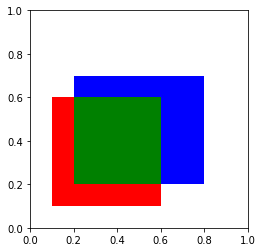

In [135]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
S = Rectangle(0.1,0.1,0.5,0.5)
R = Rectangle(0.2,0.2,0.6,0.5)
fig = plt.figure()
ax = fig.add_subplot(111, aspect='equal')
#用红色绘制S表示的矩形
ax.add_patch(patches.Rectangle((S.x,S.y),S.w,S.h, facecolor='red'))
#用蓝色绘制R表示的矩形
ax.add_patch(patches.Rectangle((R.x,R.y),R.w,R.h, facecolor='blue'))
#fig.savefig('rectangle.png', dpi=90, bbox_inches='tight')
#plt.show('rectangle.png')
if S.isInterset(R) is True:
    #如果两个矩形相交，那么用绿色绘制出相交部分的矩形
    interset = S.intersetRectangle(R)
    print("x:{0},y:{1},w:{2},h:{3}".format(interset.x,interset.y,interset.w,interset.h))
    ax.add_patch(patches.Rectangle((interset.x,interset.y),interset.w,interset.h, facecolor='green'))
    fig.savefig('rectangle1.png', dpi=90, bbox_inches='tight')
    plt.show('rectangle1.png')

In [144]:
'''
把s表示的数字字符串转换成b进制数
'''
def  strToInt(s, b):
    val = 0
    base = 1
    i= len(s) - 1
    while i >= 0:
        c = s[i]
        v = 0
        #把字符转换成对应的数字
        if '0' <= c and c <= '9':
            v = ord(c) - ord('0')
        #如果超过9，判断其是否属于16进制的'A'到'E'之间
        if c >= 'A' and c <= 'E':
            v = 10 + ord(c) - ord('A')
        if i < len(s) - 1:
            '''
            每读取一个数字就要乘以相应进进位,例如s="1234",读取4时val = 4,读取3时，val=3*10+4
            以此类推
            '''
            base *= b
        val += v*base
        i -= 1
    return val

In [150]:
print(strToInt("1234",10))
print(strToInt("1B", 13))

1234
24


In [160]:
def  intToStr(v, b):
    s=""
    c = '0'
    while v > 0:
        d = v % b
        if d >=0 and d <= 9:
            c = chr(ord('0') + d)
        elif d >= 10:
            c = chr(ord('A') + d - 10)
        s = c + s
        v = int(v/b)
    return s

In [163]:
v = 1234
print("binary form of {0} is {1}".format(v,bin(v)))
print("binary form of {0} by calling intToStr is {1}".format(v, intToStr(v, 2)))

binary form of 1234 is 0b10011010010
binary form of 1234 by calling intToStr is 10011010010


In [164]:
def  eliasGammaEncode(n):
    s = intToBinaryString(n)
    s = addZerosToHead(s)
    return s

In [166]:
def  intToBinaryString(n):
    s = ""
    while n > 0 :
        if n & 1 == 0:
            s = "0" + s
        else:
            s = "1" + s
        n = n>>1
    return s

In [171]:
def  addZerosToHead(s):
    i = len(s)
    while i - 1 > 0:
        s = '0' + s
        i -= 1
    return s

In [172]:
print(bin(13))
print(eliasGammaEncode(13))

0b1101
0001101


In [173]:
def  eliasGammaEncodeArray(array):
    s = ""
    for i in range(len(array)):
        s += eliasGammaEncode(array[i])
    return s

In [174]:
array = [11, 12, 13]
print(eliasGammaEncodeArray(array))

000101100011000001101


In [205]:
def  eliasGammaDecode(s):
    length = getHeadZerosCount(s)
    if length <= 0:
        raise Exception("head zero error")
    s = s[length:]
    binary = s[0:length+1]
    n = binaryStringToInt(binary)
    return n

In [206]:
def  getHeadZerosCount(s):
    cnt = 0
    for i in range(len(s)):
        if s[i] == '0':
            cnt+=1
        else:
            break
    return cnt
        

In [207]:
#把二进制字符串转换成对应整数
def  binaryStringToInt(s):
    n = 0
    for i in range(len(s)):
        if s[i] == '1':
            n |= 1
        if i < len(s) - 1:
            n = n << 1
    return n

In [208]:
def eliasGammaDecodeToArray(s):
    array = []
    while len(s) > 0:
        n = eliasGammaDecode(s)
        array.append(n)
        encodeLength = len(eliasGammaEncode(n))
        s = s[encodeLength:]
    return array

In [209]:
s="000101100011000001101"
print(eliasGammaDecodeToArray(s))

[11, 12, 13]


In [217]:
def  binaryAdd(x, y):
    #x,y是进行二进制相加的两个整数,v表示最终结果，advance表示进位，r表示当前相加的比特位在二进制中的位置
    v = 0
    advance = 0
    r = 0
    while x > 0 or y > 0:
        #取得当前最低位的比特位值
        i = x & 1
        j = y & 1
        x = x >> 1
        y = y >> 1
        b = i ^ j
        if b == 1:
            #两个比特位的值不同，因此亦或结果为1
            if  advance == 1:
                #存在进位，两个比特位相加的结果再加上进位后值为0，同时产生一股进位
                b = 0
        else:
            #亦或结果为0，表明两个比特位值相同
            if i & j == 1:
                #两个比特位的值都是1
                if  advance == 1:
                    #进位为1，相加结果为1，并产生一个进位
                    b = 1
                else:
                    #进位不是1，相加结果为0，同时产生一个进位
                    b = 0
                    advance = 1
            else:
                #两个比特位都是0
                if advance == 1:
                    #如果进位为1，那么相加结果为1，同时进位为0
                    b = 1
                    advance = 0
        b = b << r
        v |= b
        r += 1
        
    if advance == 1:
        v |= (advance << r)
    return v

In [219]:
a = 0b1101
b = 0b1011
print("{0} + {1} is {2}".format(bin(a),bin(b),bin(a+b)))
v = binaryAdd(a,b)
print("result from binary add is {0}".format(bin(v)))

0b1101 + 0b1011 is 0b11000
result from binary add is 0b11000


In [223]:
def  binaryMultiply(a, b):
    '''
    7*7 转换成二进制是0b111 * 0b111，它转换成三个二进制数的加法，分别是0b111, 0b1110,0b11100
    因此当第二个数的二进制格式中第i位是1时，这意味着第一个数要整体左移i为，例如第二个乘数的第1位比特位是1，因此0b111要左移
    1位，于是就对应0b1110,以下的while 循环就是实现这个过程
    '''
    stack = []
    s = 0
    while b > 0 :
        if b & 1 == 1:
            #当前第s个比特位是1，那么把a左移相应位数
            stack.append(a << s)
        else:
            #如果当前比特位是0，那么直接把0压入堆栈
            stack.append(0)
        b = b >> 1
        s += 1
    '''
    依次从堆栈中弹出两个数，执行二进制加法，把结果压回堆栈，当堆栈只剩一个数时得到最终结果
    '''
    while (len(stack) > 1):
        x = stack.pop()
        y = stack.pop()
        z = binaryAdd(x,y)
        stack.append(z)
        
    return stack.pop()

In [225]:
v = binaryMultiply(63, 7)
print(v)

441
